In [1]:
import re
import nltk
import string
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore", category=DeprecationWarning)


train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')


In [2]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [3]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [5]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [6]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

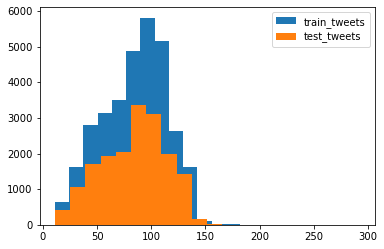

In [7]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train, bins=20, label="train_tweets")
plt.hist(length_test, bins=20, label="test_tweets")
plt.legend()
plt.show()

In [8]:
combi = train.append(test, ignore_index=True)
combi.shape

(49159, 3)

In [9]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [10]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [11]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
combi.head()

C:\Users\thuff\AppData\Local\Temp/ipykernel_21724/2668706232.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [12]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [13]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [15]:
from nltk.stem.porter import *

stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet

In [19]:
all_words = ' '.join([text for text in combi['tidy_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [20]:
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [21]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [24]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(w+)", i)
        hashtags.append(ht)
    return hashtags

#extract hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

#extract negative hashtags
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

#unnest the list
HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

In [25]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

d.nlargest(columns='Count', n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x='Hashtag', y='Count')
ax.set(ylabel = 'Count')
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1152x360 with 0 Axes>

In [26]:
b = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

d.nlargest(columns='Count', n=20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x='Hashtag', y='Count')
ax.set(ylabel = 'Count')
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1152x360 with 0 Axes>

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim

ModuleNotFoundError: No module named 'gensim'

In [34]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [35]:
tfidf_vectorizer = TfidVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

NameError: name 'TfidVectorizer' is not defined

In [36]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())

model_w2v = gensim.models.Word2Vec(tokenized_tweet, size=200, min_count=2, sg=1, hs=0, negative=10, workers=2, seed=34)
model_w2v.train(tokenized_tweet, total_examples = len(combi['tidy_tweet']), epochs=20)


NameError: name 'gensim' is not defined

In [37]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

wordvec_arrays = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
    wordvec_arrays [i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)
    
wordvec_df.shape

NameError: name 'model_w2v' is not defined

In [38]:
#Doc2Vec
#adds another feature for the context of each document (tweet)
#this vector is trained along with the word vectors

from tqdm import tqdm
tqdm.pandas(desc='progress-bar')
from gensim.models.doc2vec import LabeledSentence

def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ['tweet_' + str(i)]))
    return output

labeled_tweets = add_label(tokenized_tweet)
labeled_tweets[:6]

ModuleNotFoundError: No module named 'gensim'

In [39]:
model_d2v = gensim.models.Doc2Vec9(dm=1, dm_mean = 1, size = 200, window=5, negative=7, min_count=5, workers=3, alpha=0.1, seed=23)
model_d2v.train(labeled_tweets, total_examples=len(combi['tidy_tweet']), epochs=15)

NameError: name 'gensim' is not defined

In [40]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200))

for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))
    
docvec_df = pd.DataFrame(docvec_arrays)
docvec_df.shape

NameError: name 'model_d2v' is not defined

In [41]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

#Bag-of_Words Features
train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain)

prediction = lreg.predict_proba(xvalid_bow)
prediction_int = prediciton[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

NameError: name 'bow' is not defined

In [42]:
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int.astype(np.int)
test['label'] = test_pred_int

NameError: name 'lreg' is not defined

In [43]:
#TF-IDF Features

train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]
train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediciton[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

NameError: name 'tfidf' is not defined

In [44]:
#Word2Vec Features

train_w2v = wordvec_df.iloc[:31962,:]
test_w2v = wordvec_df.iloc[31962:,:]
xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

lreg.fit(xtrain_w2v, ytrain)

prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediciton[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

NameError: name 'wordvec_df' is not defined

In [45]:
#Doc2Vec Features

train_d2v = docvec_df.iloc[:31962,:]
test_d2v = docvec_df.iloc[31962:,:]
xtrain_d2v = train_d2v.iloc[ytrain.index,:]
xvalid_d2v = train_d2v.iloc[yvalid.index,:]

lreg.fit(xtrain_d2v, ytrain)

prediction = lreg.predict_proba(xvalid_d2v)
prediction_int = prediciton[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)

f1_score(yvalid, prediction_int)

NameError: name 'docvec_df' is not defined

In [46]:
#SVM

from sklearn import svm

In [47]:
#Bag-ofWords Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_bow, ytrain)
prediction = svc.predict_proba(xvalid_bow)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

NameError: name 'xtrain_bow' is not defined

In [48]:
#TF-IDF Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_tfidf, ytrain)
prediction = svc.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

NameError: name 'xtrain_tfidf' is not defined

In [49]:
#Word2Vec Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain)
prediction = svc.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

NameError: name 'xtrain_w2v' is not defined

In [50]:
#Doc2Vec Features

svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_d2v, ytrain)
prediction = svc.predict_proba(xvalid_d2v)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int)

NameError: name 'xtrain_d2v' is not defined

In [51]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

In [52]:
#Bag-of-Words Features

rf = RandomForestClassifier(n_estimators=400, random_state=l1).fit(xtrain_bow, ytrain)
prediction = rf.predict(xvalid_bow)
test_pred = rf.predict(test_bow)
test['label'] = test_pred

NameError: name 'l1' is not defined

In [53]:
#TF-IDF Features

rf = RandomForestClassifier(n_estimators=400, random_state=l1).fit(xtrain_tfidf, ytrain)
prediction = rf.predict(xvalid_tfidf)
test_pred = rf.predict(test_tfidf)
test['label'] = test_pred

NameError: name 'l1' is not defined

In [54]:
#Word2Vec Features

rf = RandomForestClassifier(n_estimators=400, random_state=l1).fit(xtrain_w2v, ytrain)
prediction = rf.predict(xvalid_w2v)
test_pred = rf.predict(test_w2v)
test['label'] = test_pred

NameError: name 'l1' is not defined

In [55]:
#Doc2Vec Features

rf = RandomForestClassifier(n_estimators=400, random_state=l1).fit(xtrain_d2v, ytrain)
prediction = rf.predict(xvalid_d2v)
test_pred = rf.predict(test_d2v)
test['label'] = test_pred

NameError: name 'l1' is not defined

In [57]:
#XGBoost

from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [58]:
#Bag-of-Words Features

xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_bow, ytrain)
prediction = xgb_model.predict(xvalid_bow)
f1_score(yvalid, prediction)

NameError: name 'XGBClassifier' is not defined

In [59]:
#TF-IDF Features

xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_tfidf, ytrain)
prediction = xgb_model.predict(xvalid_tfidf)
f1_score(yvalid, prediction)

NameError: name 'XGBClassifier' is not defined

In [60]:
#Word2Vec Features

xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_w2v, ytrain)
prediction = xgb_model.predict(xvalid_w2v)
f1_score(yvalid, prediction)

NameError: name 'XGBClassifier' is not defined

In [61]:
#Doc2Vec Features

xgb_model = XGBClassifier(max_depth=6, n_estimators=1000).fit(xtrain_d2v, ytrain)
prediction = xgb_model.predict(xvalid_d2v)
f1_score(yvalid, prediction)

NameError: name 'XGBClassifier' is not defined

In [62]:
#Since XGBoost with the Word2Vec model has given usthe best results so far, we will tune this model

import xgboost as xgb

dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid = xgb.DMatrix(xalid_w2v, label=yvalid)
dtest = xgb.DMatrix(test_w2v)

#parameters to tune
params = {
    'objective': 'binary:logistic',
    'max_depth':6,
    'min_child_weight':1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree':1
}

def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(np.int)
    preds = (preds >= 0.3).astype(np.int)
    return [('f1_score', f1_score(labels, preds))]

ModuleNotFoundError: No module named 'xgboost'

In [64]:
gridsearch_params = [
    (max_depth, min_child_weight) for max_depth in range(6,10) for min_child_weight in range(5,8)
]

max_f1 = 0
best_params = None
for max_depth, min_child_weight in gridseach_params:
    print("CV with max_depth={}, min_child_weight={}".format(max_depth, min_child_weight))
    
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    #cross-validation
    cv_results = xgb.cv(params, dtrain, feval=custom_eval, num_boost_round=200, maximize=True, seed=16, nfold=5, early_stopping_rounds=10)

    
#Find the best f1 score
mean_f1 = cv_results['tet-f1_score-mean'].argmax()
print('\fF1 Score {} for {} rounds'.format(mean_f1, boost_rounds))
if mean_f1 > max_f1:
    max_f1 = mean_f1
    best_params = (max_depth, min_child_weight)
    
print('Best params: {}, {}, F1 Score: {}'.format(best_params[0], best_params[1], max_f1))

NameError: name 'gridseach_params' is not defined